In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [6]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [7]:
df['Manufacturer'] = df['Manufacturer'].str.lower()
df['Model'] = df['Model'].str.lower()

In [8]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,lexus,rx 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,chevrolet,equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,honda,fit,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,ford,escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,honda,fit,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [9]:
#See unique values in objects
to_group=[]
for i in df.columns: 
    if df[i].dtype == 'O':
        to_group.append(i)
for i in df.columns: 
    print(i ,df[i].nunique())

ID 18924
Price 2315
Levy 559
Manufacturer 65
Model 1511
Prod. year 54
Category 11
Leather interior 2
Fuel type 7
Engine volume 107
Mileage 7687
Cylinders 13
Gear box type 4
Drive wheels 3
Doors 3
Wheel 2
Color 16
Airbags 17


In [10]:
#check missing data
len(df)

19237

In [11]:
df.drop('Levy', axis = 1, inplace=True)

In [12]:
df.head()

,ID,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,lexus,rx 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,chevrolet,equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,honda,fit,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,ford,escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,honda,fit,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [13]:
df[df['Manufacturer']=='LEXUS'].Model.str.lower().nunique()

0

In [14]:
#sns.pairplot(data = df, hue='Fuel type')

In [15]:
df['Mileage'] = df['Mileage'].str.rstrip('km')
df['Mileage'] = pd.to_numeric(df['Mileage'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  object 
 9   Mileage           19237 non-null  int64  
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  object 
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-null  int64 

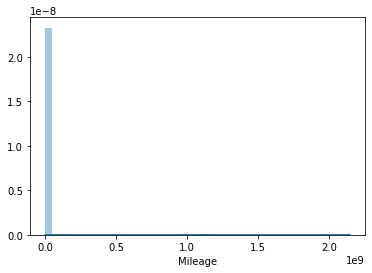

In [17]:
sns.distplot(df['Mileage'])

In [18]:
df[df['Price']<=10000]

,ID,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2,45774419,8467,honda,fit,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,ford,escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0
6,45656768,1803,toyota,prius,2010,Hatchback,Yes,Hybrid,1.8,258909,4.0,Automatic,Front,04-May,Left wheel,White,12
7,45816158,549,hyundai,sonata,2013,Sedan,Yes,Petrol,2.4,216118,4.0,Automatic,Front,04-May,Left wheel,Grey,12
8,45641395,1098,toyota,camry,2014,Sedan,Yes,Hybrid,2.5,398069,4.0,Automatic,Front,04-May,Left wheel,Black,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19230,45760891,470,toyota,prius,2011,Hatchback,Yes,Hybrid,1.8,307325,4.0,Automatic,Front,04-May,Left wheel,Silver,12
19231,45772306,5802,mercedes-benz,e 350,2013,Sedan,Yes,Diesel,3.5,107800,6.0,Automatic,Rear,04-May,Left wheel,Grey,12
19232,45798355,8467,mercedes-benz,clk 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19235,45793526,5331,chevrolet,captiva,2007,Jeep,Yes,Diesel,2,51258,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [19]:
df['Mileage'] = df['Mileage'].astype(np.int64)
df['Price'] = df['Price'].astype(np.int64)

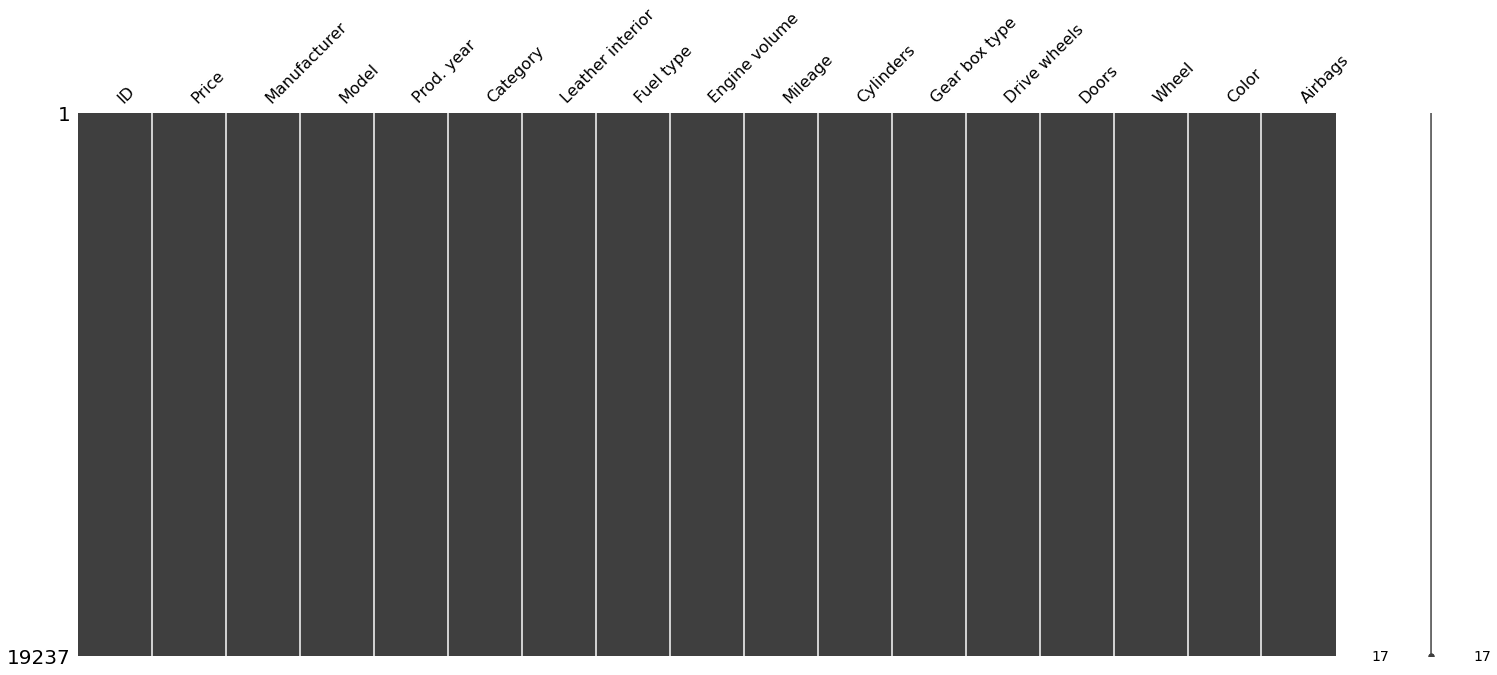

In [20]:
msno.matrix(df)

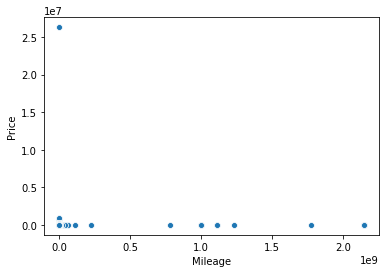

In [21]:
sns.scatterplot(data=df, x='Mileage', y='Price')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  object 
 9   Mileage           19237 non-null  int64  
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  object 
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-null  int64 

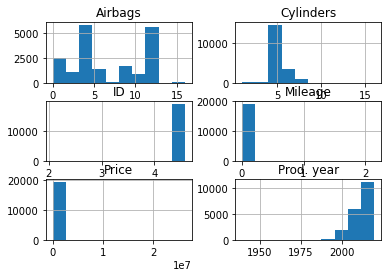

In [22]:
df.hist()
df.info()

In [23]:
#Let's drop limit mileage data
index_names = df[(df['Mileage'] == 0)].index
df.drop(index_names, inplace = True)
index_names2 = df[(df['Mileage'] >= 400000)].index
df.drop(index_names2, inplace = True)
df.sort_values('Mileage')

,ID,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
12503,45115490,17562,chevrolet,cruze,2019,Hatchback,No,Petrol,1.4,13,4.0,Automatic,Front,04-May,Left wheel,Black,8
17566,38654026,135,toyota,corolla 140,2019,Sedan,No,Petrol,1.6,18,4.0,Variator,Front,04-May,Left wheel,Black,12
1626,45732087,96915,hyundai,santa fe,2020,Jeep,Yes,Petrol,2,21,4.0,Automatic,Front,04-May,Left wheel,Grey,4
11920,45803551,61781,hyundai,sonata,2020,Sedan,Yes,Petrol,2,98,4.0,Automatic,Front,04-May,Left wheel,White,4
2353,45804409,116036,mercedes-benz,x 250,2019,Pickup,Yes,Diesel,2.5,102,4.0,Automatic,4x4,04-May,Left wheel,Silver,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18137,45646059,1098,toyota,camry,2014,Sedan,Yes,Hybrid,2.5,398069,4.0,Automatic,Front,04-May,Left wheel,Black,12
6141,45646488,1098,toyota,camry,2014,Sedan,Yes,Hybrid,2.5,398069,4.0,Automatic,Front,04-May,Left wheel,Black,12
17198,45645788,1098,toyota,camry,2014,Sedan,Yes,Hybrid,2.5,398069,4.0,Automatic,Front,04-May,Left wheel,Black,12
9086,45641259,1098,toyota,camry,2014,Sedan,Yes,Hybrid,2.5,398069,4.0,Automatic,Front,04-May,Left wheel,Black,12


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018616B397C0>,
      dtype=object)

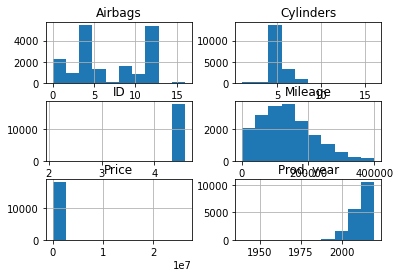

In [24]:
df.hist()

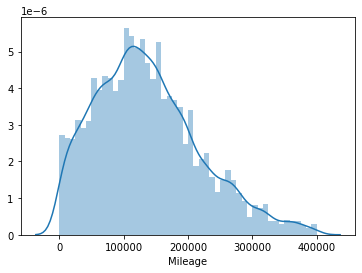

In [27]:
sns.distplot(df['Mileage'])

In [32]:
index_namesP = df[(df['Price'] <= 100)].index
df.drop(index_namesP, inplace = True)
index_namesP2 = df[(df['Price'] >= 100000)].index
df.drop(index_namesP2, inplace = True)
df.sort_values('Price')

,ID,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
7960,45786476,110,nissan,quest,2010,Minivan,Yes,Petrol,3.5,70000,6.0,Automatic,Front,04-May,Left wheel,Silver,8
15050,40220601,110,bmw,x5,2008,Jeep,Yes,Petrol,3,121121,6.0,Automatic,4x4,04-May,Left wheel,Black,10
11948,45807545,110,mercedes-benz,c 300,2015,Sedan,Yes,Petrol,2,64003,4.0,Automatic,Rear,04-May,Left wheel,Silver,12
13688,45642650,110,hyundai,santa fe,2019,Jeep,Yes,Petrol,2,28797,4.0,Automatic,Front,04-May,Left wheel,White,12
4408,43701086,110,toyota,camry,2013,Sedan,Yes,Petrol,2.5,208000,4.0,Tiptronic,Front,04-May,Left wheel,Black,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10372,45802548,98066,hyundai,santa fe,2019,Minivan,Yes,Diesel,2.2,17632,4.0,Automatic,Front,04-May,Left wheel,White,4
2728,45808865,98282,ford,explorer,2017,Jeep,Yes,Petrol,3.5,20000,4.0,Automatic,Front,04-May,Left wheel,White,4
9405,45781828,98787,lexus,gx 460,2014,Jeep,Yes,Petrol,4.6,76000,8.0,Tiptronic,4x4,04-May,Left wheel,Grey,12
10230,45804437,99440,lexus,nx 300,2016,Jeep,Yes,Hybrid,2.5,40450,4.0,Automatic,Front,04-May,Left wheel,White,4


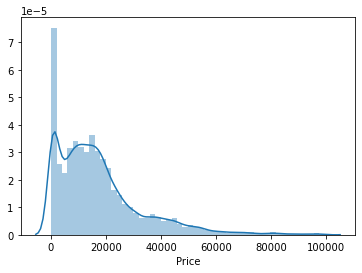

In [33]:
sns.distplot(df.Price)

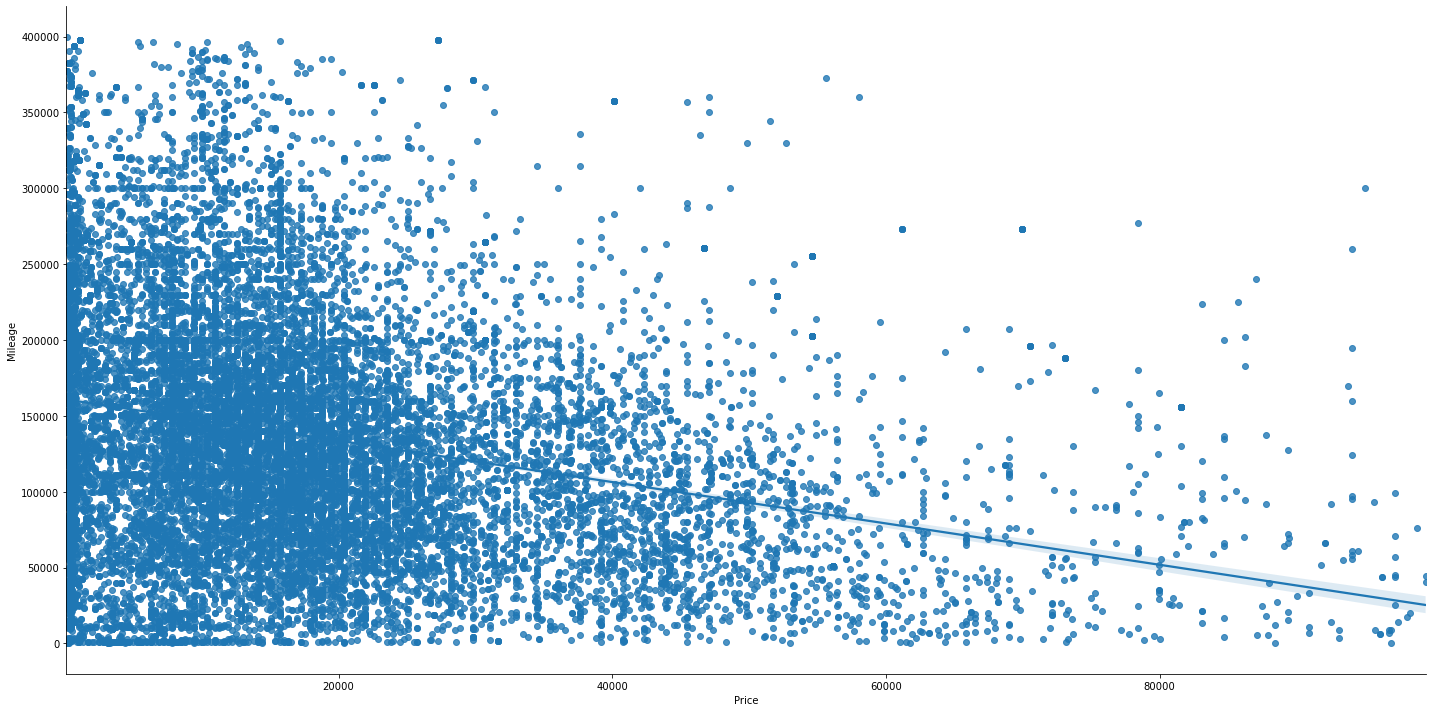

In [39]:
sns.lmplot(data = df, x='Price', y='Mileage', height=10, aspect=2)
#Expected, more mileage => less price

In [44]:
df[df['Price']<=1000]

,ID,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
7,45816158,549,hyundai,sonata,2013,Sedan,Yes,Petrol,2.4,216118,4.0,Automatic,Front,04-May,Left wheel,Grey,12
10,45621750,941,mercedes-benz,e 350,2014,Sedan,Yes,Diesel,3.5,184467,6.0,Automatic,Rear,04-May,Left wheel,White,12
15,45465200,549,toyota,chr,2018,Jeep,Yes,Petrol,2,74146,4.0,Automatic,Front,04-May,Left wheel,White,12
18,45772104,549,hyundai,sonata,2006,Sedan,Yes,Petrol,3.3,295059,6.0,Automatic,Rear,04-May,Left wheel,Blue,12
19,45653306,941,lexus,rx 400,2008,Jeep,Yes,Hybrid,3.5,364523,6.0,Automatic,4x4,04-May,Left wheel,Black,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19201,45813639,549,lexus,hs 250h,2010,Sedan,Yes,Hybrid,2.4,180234,4.0,Automatic,Front,04-May,Left wheel,White,0
19215,45763841,470,hyundai,elantra,2017,Sedan,Yes,Petrol,1.6,25635,4.0,Automatic,Front,04-May,Left wheel,Black,12
19228,45773726,706,mercedes-benz,e 350,2008,Sedan,Yes,Diesel,3.5,122874,6.0,Automatic,Rear,04-May,Left wheel,Black,12
19230,45760891,470,toyota,prius,2011,Hatchback,Yes,Hybrid,1.8,307325,4.0,Automatic,Front,04-May,Left wheel,Silver,12


C:\Users\Kamen\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 4321 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kamen\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 4334 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kamen\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 4309 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kamen\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 4304 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kamen\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Kamen\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Gly

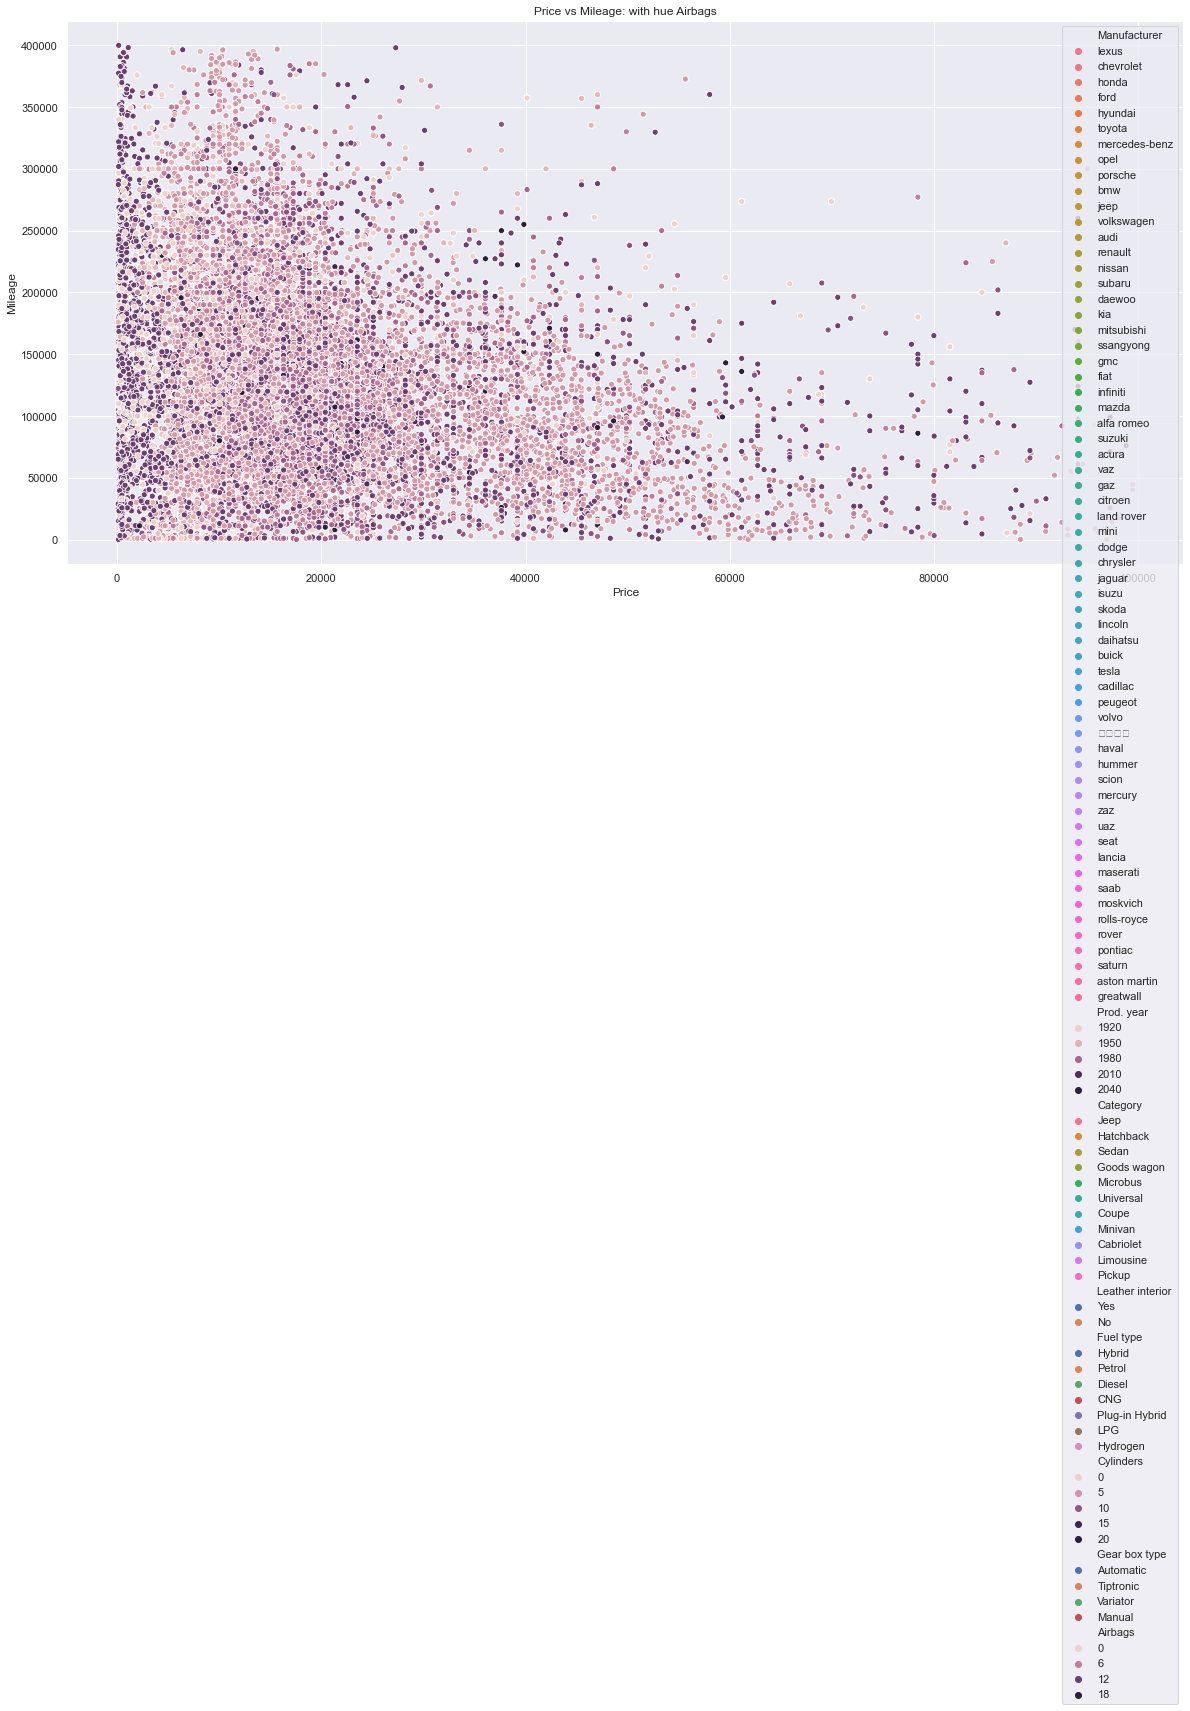

In [54]:
cols = ['Manufacturer', 'Prod. year', 'Category', 'Leather interior', 'Fuel type', 'Cylinders', 'Gear box type', 'Airbags']
for i in cols: 
    sns.set(rc={"figure.figsize":(20, 10)}) 
    sns.scatterplot(data=df, x='Price', y='Mileage', hue=i).set(title='Price vs Mileage: with hue '+i)

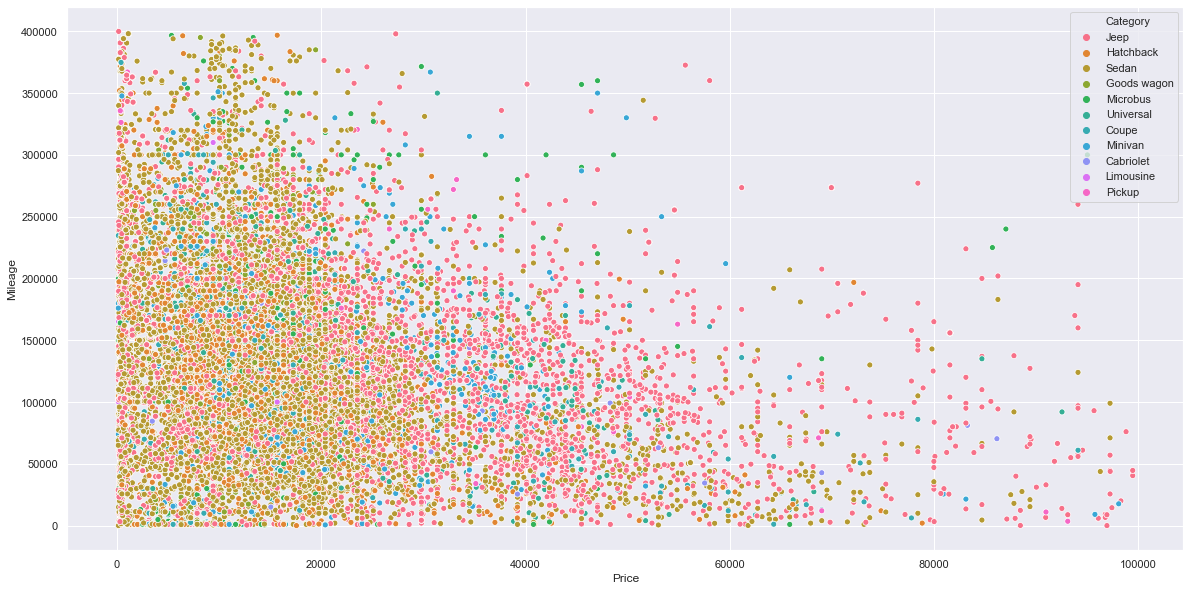

In [53]:
sns.set(rc={"figure.figsize":(20, 10)}) 
sns.scatterplot(data=df, x='Price', y='Mileage', hue='Category')